to compare the geometry fidelity of 3D models from LiDAR scans and Gaussian Splatting models by computing Precision, Recall, and F-score using different distance thresholds for 5 categories of scenes. After computation, you want to visualize the results and save the figure.



Plan
Load Models: Load Gaussian and LiDAR models from their respective file paths.
Compute F-score: Implement a function to compute Precision, Recall, and F-score for given distance thresholds.
Visualization: Plot the F-score vs. distance threshold, precision-recall curve, and AUC bars.
Save Plot: Save plots as requested.


In [9]:
# Importing required library for loading 3D models
import trimesh

# Load Gaussian Models
gaussian_models = {
    'Natural': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Natural/3DGS.ply'),
    'Accidental': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Accidental/3DGS.ply'),
    'Homicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Homicidal/3DGS.ply'),
    'Suicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Suicidal/3DGS.ply'),
    'Undetermined': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Undetermined/3DGS.ply')
}

# Load LiDAR Models
lidar_models = {
    'Natural': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Natural/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Accidental': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Accidental/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Homicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Homicidal/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Suicidal': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Suicidal/LiDARPLY/AdvancedExport/3DModel.ply'),
    'Undetermined': trimesh.load('/Users/aaeshahalhakamy/MyResearch/Forensics/Scenes/Undetermined/LiDARPLY/AdvancedExport/3DModel.ply')
}

In [10]:
import numpy as np

def compute_fscore(gaussian, lidar, thresholds):
    """
    Computes Precision, Recall, F-score at multiple distance thresholds.
    """
    F_scores = []
    for threshold in thresholds:
        # Compute distances from Gaussian to LiDAR
        distances = gaussian.kdtree.query(lidar.vertices)[0]
        
        # True Positives: close enough points
        TP = np.sum(distances < threshold)
        
        # Precision: TP / (TP + FP), approximated as Gaussian points
        precision = TP / len(gaussian.vertices)
        
        # Recall: TP / (TP + FN), approximated as LiDAR points
        recall = TP / len(lidar.vertices)
        
        # F-Score: harmonic mean of precision and recall
        if precision + recall == 0:
            fscore = 0
        else:
            fscore = 2 * (precision * recall) / (precision + recall)
        
        F_scores.append((precision, recall, fscore))
    
    return F_scores

# Define the distance thresholds
thresholds = [0.01, 0.02, 0.05]

# Compute F-scores for each model
fscore_results = {}
for name in gaussian_models.keys():
    fscore_results[name] = compute_fscore(gaussian_models[name], lidar_models[name], thresholds)

print(fscore_results)

{'Natural': [(0.016695604496024856, 0.00471620671389585, 0.0073548119068245574), (0.06025404368089189, 0.017020679030511045, 0.026543343069971755), (0.19948460202869414, 0.056350796979562585, 0.08787772413859733)], 'Accidental': [(0.013557714760369263, 0.004795612701627268, 0.007085096611989892), (0.05230219123044372, 0.01850024558127101, 0.02733248813949611), (0.18527510253846194, 0.06553520639230079, 0.09682251208872486)], 'Homicidal': [(0.07231763260829534, 0.014198953811484236, 0.02373729171834997), (0.24167056200056256, 0.04744996515618531, 0.07932511647632265), (0.811945420807356, 0.15941859698221575, 0.26651018040753516)], 'Suicidal': [(0.016481281141955646, 0.009565247759580432, 0.012105070745822817), (0.05262393664406633, 0.030541375257750743, 0.038650907688146705), (0.1890199792528678, 0.10970160131919791, 0.13883024029031416)], 'Undetermined': [(0.01863966337059253, 0.0045265829992171, 0.007284217043846211), (0.06380008277189947, 0.01549364729834944, 0.024932513054880128), (

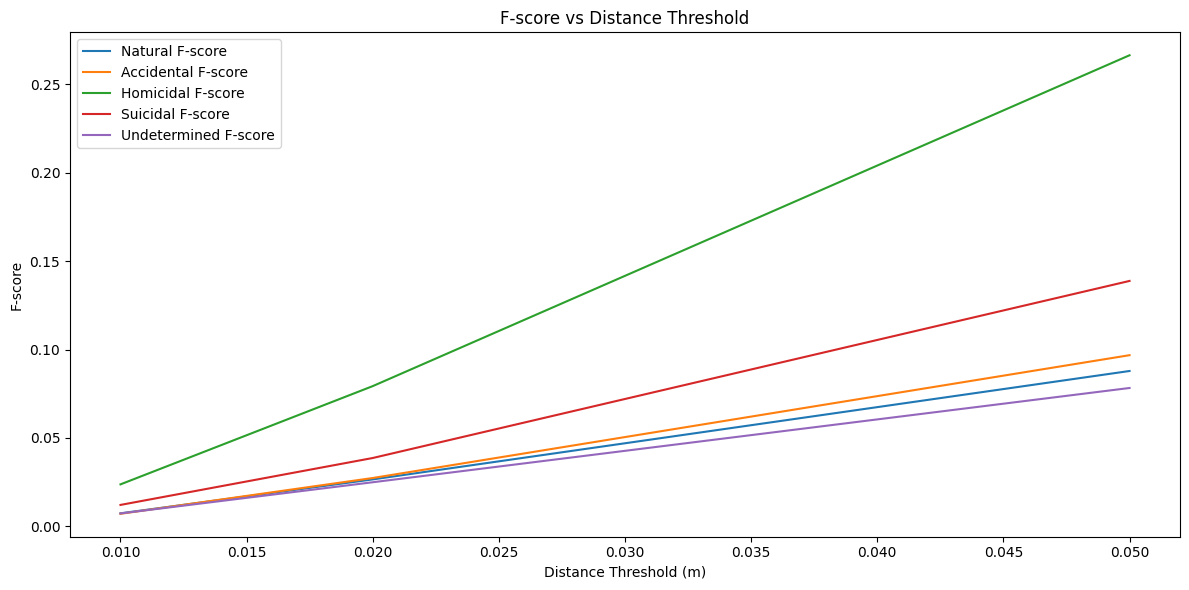

In [13]:
import matplotlib.pyplot as plt

# Define model names according to your requirements
model_names = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']

# Plotting F-score and other metrics
def plot_metrics(fscore_results, thresholds, model_names):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    for model_name in model_names:
        precisions, recalls, fscores = zip(*fscore_results[model_name])
        
        ax.plot(thresholds, fscores, label=f'{model_name} F-score')
    
    ax.set_xlabel('Distance Threshold (m)')
    ax.set_ylabel('F-score')
    ax.set_title('F-score vs Distance Threshold')
    ax.legend()
    plt.tight_layout()
    
    # Save the figure
    fig.savefig('Images/geometry_fidelity.png', dpi=200)

plot_metrics(fscore_results, thresholds, model_names)

{'Natural': [(0.016695604496024856, 0.00471620671389585, 0.0073548119068245574), (0.06025404368089189, 0.017020679030511045, 0.026543343069971755), (0.19948460202869414, 0.056350796979562585, 0.08787772413859733)], 'Accidental': [(0.013557714760369263, 0.004795612701627268, 0.007085096611989892), (0.05230219123044372, 0.01850024558127101, 0.02733248813949611), (0.18527510253846194, 0.06553520639230079, 0.09682251208872486)], 'Homicidal': [(0.07231763260829534, 0.014198953811484236, 0.02373729171834997), (0.24167056200056256, 0.04744996515618531, 0.07932511647632265), (0.811945420807356, 0.15941859698221575, 0.26651018040753516)], 'Suicidal': [(0.016481281141955646, 0.009565247759580432, 0.012105070745822817), (0.05262393664406633, 0.030541375257750743, 0.038650907688146705), (0.1890199792528678, 0.10970160131919791, 0.13883024029031416)], 'Undetermined': [(0.01863966337059253, 0.0045265829992171, 0.007284217043846211), (0.06380008277189947, 0.01549364729834944, 0.024932513054880128), (0.20027602474631123, 0.048636395987585755, 0.07826611478576669)]}


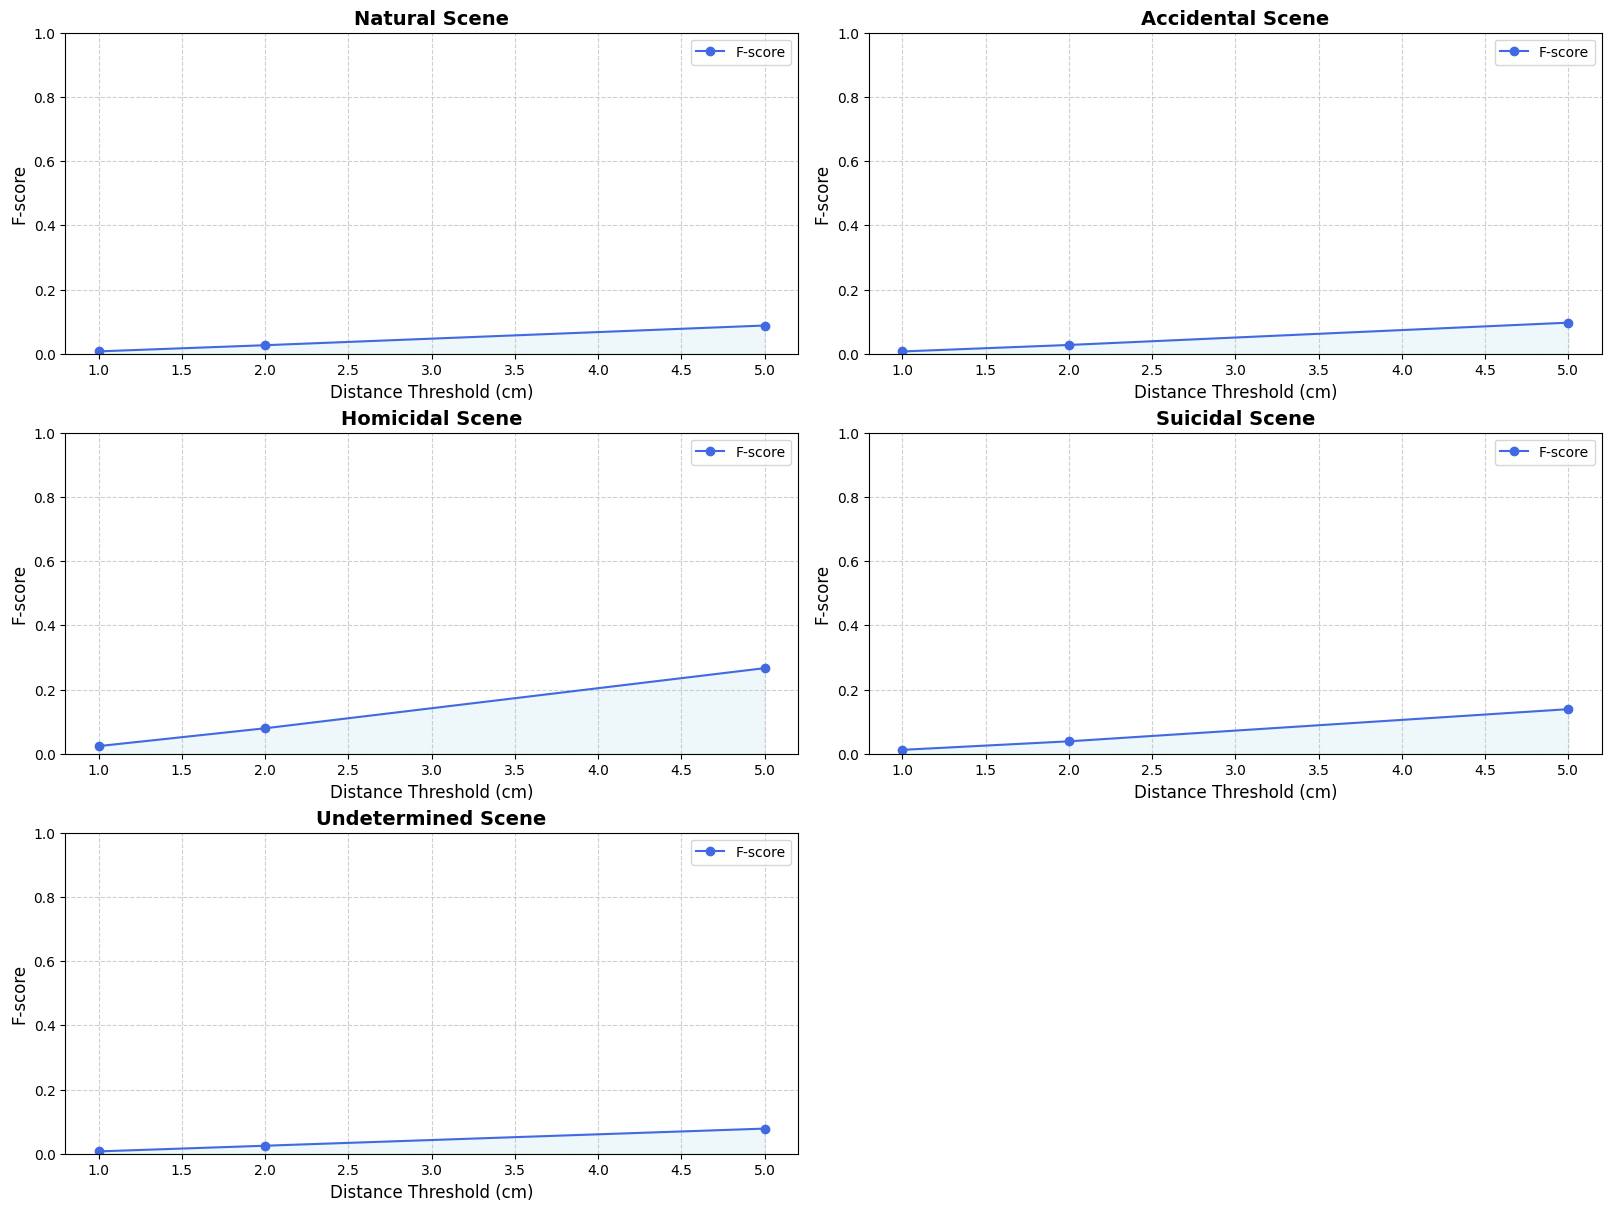

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Function to plot F-scores
def plot_fscore_results(fscore_results, thresholds, model_names):
    # Create a subplot for each model
    fig, axes = plt.subplots(3, 2, figsize=(16, 12), constrained_layout=True)
    axes = axes.flatten()

    # Iterate over scenes and plot results
    for idx, model_name in enumerate(model_names):
        if model_name not in fscore_results:
            continue
        
        precisions, recalls, fscores = zip(*fscore_results[model_name])
        
        axes[idx].plot(thresholds, fscores, marker='o', label='F-score', color='royalblue')
        axes[idx].fill_between(thresholds, fscores, alpha=0.2, color='lightblue')
        
        # Set labels and title
        axes[idx].set_title(f'{model_name} Scene', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel('Distance Threshold (cm)', fontsize=12)
        axes[idx].set_ylabel('F-score', fontsize=12)
        axes[idx].set_ylim(0, 1)
        axes[idx].grid(True, linestyle='--', alpha=0.6)
        axes[idx].legend()
    
    # Remove any empty subplots (extra subplot for uneven number of items)
    if len(model_names) % 2 != 0:
        fig.delaxes(axes[-1])
        
    # Save the figure
    os.makedirs('Images', exist_ok=True)
    fig.savefig('Images/geometry_fidelity.png', dpi=200)

    # Show plot
    plt.show()

# Example usage
fscore_results = {
    'Natural': [(0.016695604496024856, 0.00471620671389585, 0.0073548119068245574), 
                (0.06025404368089189, 0.017020679030511045, 0.026543343069971755), 
                (0.19948460202869414, 0.056350796979562585, 0.08787772413859733)],
    'Accidental': [(0.013557714760369263, 0.004795612701627268, 0.007085096611989892), 
                   (0.05230219123044372, 0.01850024558127101, 0.02733248813949611), 
                   (0.18527510253846194, 0.06553520639230079, 0.09682251208872486)],
    'Homicidal': [(0.07231763260829534, 0.014198953811484236, 0.02373729171834997), 
                  (0.24167056200056256, 0.04744996515618531, 0.07932511647632265), 
                  (0.811945420807356, 0.15941859698221575, 0.26651018040753516)],
    'Suicidal': [(0.016481281141955646, 0.009565247759580432, 0.012105070745822817), 
                 (0.05262393664406633, 0.030541375257750743, 0.038650907688146705), 
                 (0.1890199792528678, 0.10970160131919791, 0.13883024029031416)],
    'Undetermined': [(0.01863966337059253, 0.0045265829992171, 0.007284217043846211), 
                     (0.06380008277189947, 0.01549364729834944, 0.024932513054880128), 
                     (0.20027602474631123, 0.048636395987585755, 0.07826611478576669)]
}
thresholds = [1, 2, 5]  # Thresholds in cm
model_names = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']

plot_fscore_results(fscore_results, thresholds, model_names)

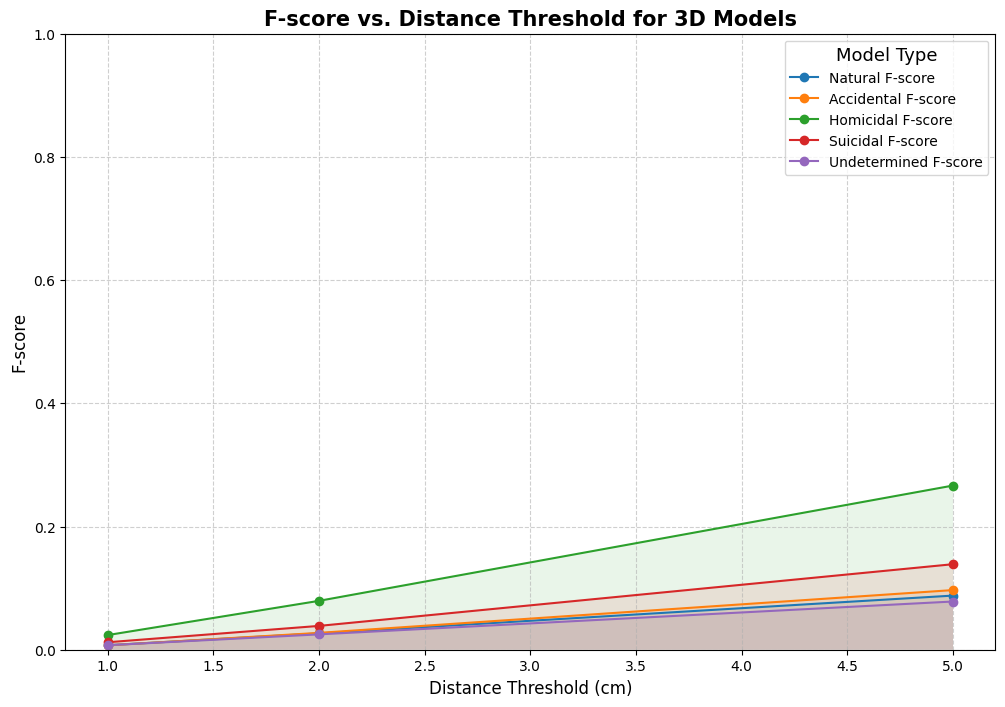

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_combined_fscore(fscore_results, thresholds, model_names):
    plt.figure(figsize=(12, 8))
    
    for model_name in model_names:
        if model_name not in fscore_results:
            continue
        
        precisions, recalls, fscores = zip(*fscore_results[model_name])
        
        plt.plot(thresholds, fscores, marker='o', label=f'{model_name} F-score')
        plt.fill_between(thresholds, fscores, alpha=0.1)
    
    plt.xlabel('Distance Threshold (cm)', fontsize=12)
    plt.ylabel('F-score', fontsize=12)
    plt.title('F-score vs. Distance Threshold for 3D Models', fontsize=15, fontweight='bold')
    
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.ylim(0, 1)
    
    # Add legend
    plt.legend(title='Model Type', fontsize=10, title_fontsize='13')
    
    # Save the figure
    os.makedirs('Images', exist_ok=True)
    plt.savefig('Images/combined_geometry_fidelity.png', dpi=200)
    
    # Show plot
    plt.show()

# Example usage
fscore_results = {
    'Natural': [(0.016695604496024856, 0.00471620671389585, 0.0073548119068245574), 
                (0.06025404368089189, 0.017020679030511045, 0.026543343069971755), 
                (0.19948460202869414, 0.056350796979562585, 0.08787772413859733)],
    'Accidental': [(0.013557714760369263, 0.004795612701627268, 0.007085096611989892), 
                   (0.05230219123044372, 0.01850024558127101, 0.02733248813949611), 
                   (0.18527510253846194, 0.06553520639230079, 0.09682251208872486)],
    'Homicidal': [(0.07231763260829534, 0.014198953811484236, 0.02373729171834997), 
                  (0.24167056200056256, 0.04744996515618531, 0.07932511647632265), 
                  (0.811945420807356, 0.15941859698221575, 0.26651018040753516)],
    'Suicidal': [(0.016481281141955646, 0.009565247759580432, 0.012105070745822817), 
                 (0.05262393664406633, 0.030541375257750743, 0.038650907688146705), 
                 (0.1890199792528678, 0.10970160131919791, 0.13883024029031416)],
    'Undetermined': [(0.01863966337059253, 0.0045265829992171, 0.007284217043846211), 
                     (0.06380008277189947, 0.01549364729834944, 0.024932513054880128), 
                     (0.20027602474631123, 0.048636395987585755, 0.07826611478576669)]
}
thresholds = [1, 2, 5]  # Thresholds in cm
model_names = ['Natural', 'Accidental', 'Homicidal', 'Suicidal', 'Undetermined']

plot_combined_fscore(fscore_results, thresholds, model_names)